# Test 01

Please log in to Hugging Face Hub:


Loaded as API: https://stabilityai-stable-diffusion-3-medium.hf.space ✔
Successfully connected to the Space!

Generating image with prompt: 'A beautiful oil painting of a futuristic city with flying cars, vibrant colors, detailed.'...
Image generated successfully by the API!
Temporary image path (webp): /tmp/gradio/d10a5e492e00b79f54cf611457f4ca6a3ea6193a0092f98579a2ad6e893e0e5e/image.webp
Seed used for this generation: 42


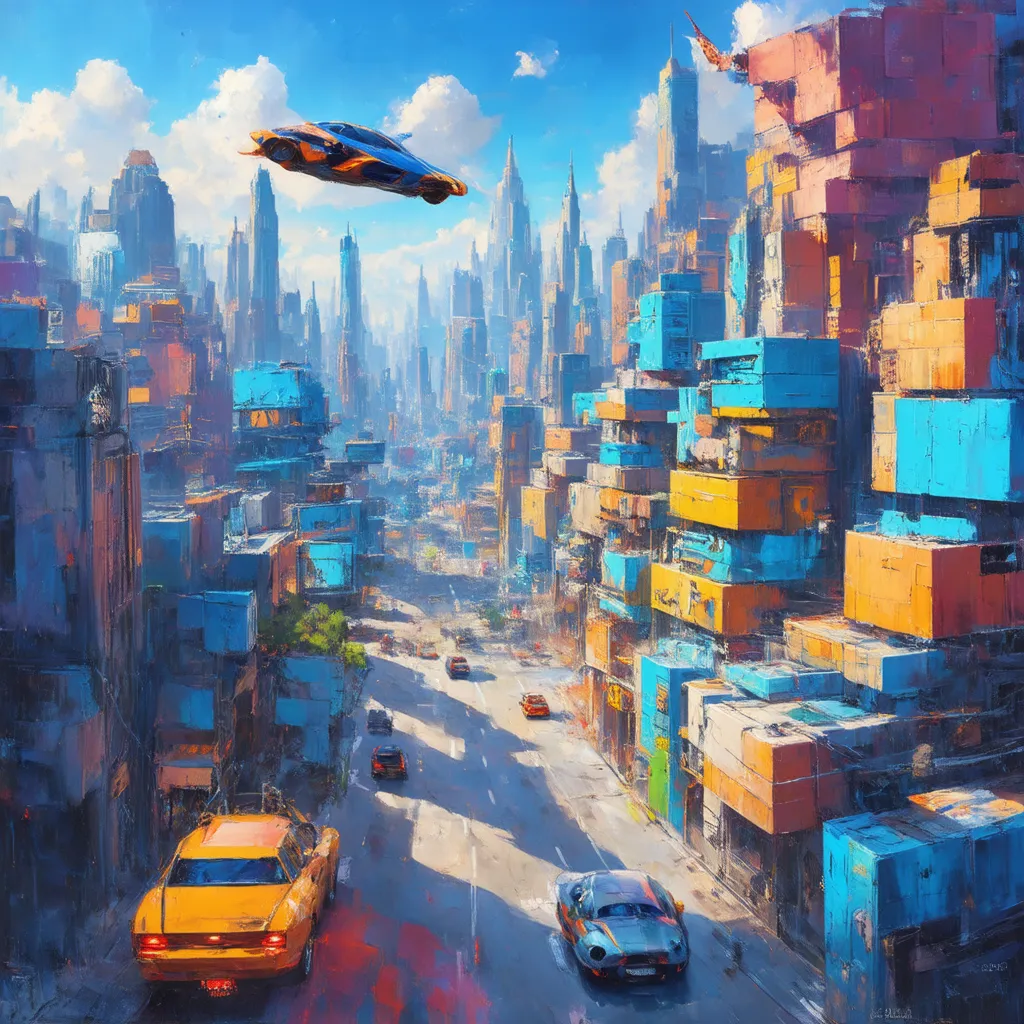

Image converted to PNG and displayed from: /tmp/gradio/displayed_image.png
Image permanently saved to Colab environment: sd3_generated_image.png (you can download it from the file browser)


In [ ]:
# 1. Install the gradio_client library
!pip install gradio_client pillow -q # Added pillow for image conversion

# 2. Import necessary libraries
from gradio_client import Client, file
from huggingface_hub import login
from IPython.display import Image as IPImage, display # Renamed to IPImage to avoid conflict with PIL.Image
from PIL import Image as PILImage # Import Pillow Image
import os
import shutil # For copying files

# 3. Log in to Hugging Face (important for gated models like SD3)
print("Please log in to Hugging Face Hub:")
login()

# 4. Initialize the client
try:
    client = Client("stabilityai/stable-diffusion-3-medium")
    print("Successfully connected to the Space!")
except Exception as e:
    print(f"Error connecting to the Space: {e}")
    print("Make sure you have accepted the terms for 'stabilityai/stable-diffusion-3-medium' on Hugging Face.")
    raise

# 5. Define your parameters
prompt_text = "A beautiful oil painting of a futuristic city with flying cars, vibrant colors, detailed."
negative_prompt_text = "ugly, blurry, deformed, watermark, text, signature, low quality"
seed_value = 42
randomize_s = False
image_width = 1024
image_height = 1024
guidance = 5.0
inference_steps = 28

# 6. Make the prediction
print(f"\nGenerating image with prompt: '{prompt_text}'...")
image_filepath = None # Initialize to None
try:
    result = client.predict(
            prompt=prompt_text,
            negative_prompt=negative_prompt_text,
            seed=seed_value,
            randomize_seed=randomize_s,
            width=image_width,
            height=image_height,
            guidance_scale=guidance,
            num_inference_steps=inference_steps,
            api_name="/infer"
    )

    image_filepath = result[0] # This is the path to the .webp file
    returned_seed = result[1]

    print(f"Image generated successfully by the API!")
    print(f"Temporary image path (webp): {image_filepath}")
    print(f"Seed used for this generation: {returned_seed}")

    # 7. Display the image (converting WEBP to PNG for display)
    if image_filepath:
        try:
            # Open the webp image using Pillow
            img = PILImage.open(image_filepath)

            # Option 1: Display directly from Pillow object (often works)
            # display(img)
            # print("Image displayed using Pillow.")

            # Option 2: Convert to PNG and then display (more robust for IPython.display)
            png_temp_path = "/tmp/gradio/displayed_image.png" # Temporary path for PNG
            img.save(png_temp_path, "PNG")
            display(IPImage(filename=png_temp_path))
            print(f"Image converted to PNG and displayed from: {png_temp_path}")

            # Optional: Save it permanently in Colab's content directory
            # (it will be downloadable from the Colab file browser on the left)
            desired_filename = "sd3_generated_image.png"
            shutil.copy(png_temp_path, desired_filename)
            print(f"Image permanently saved to Colab environment: {desired_filename} (you can download it from the file browser)")

        except Exception as display_e:
            print(f"An error occurred while trying to display or convert the image: {display_e}")
            print(f"The generated image is at the temporary path: {image_filepath} (it's a WEBP file)")
    else:
        print("Image generation did not return a filepath.")

except Exception as e:
    print(f"An error occurred during API prediction: {e}")
    print("This could be due to various reasons:")
    print("- The Hugging Face Space might be busy or down.")
    print("- You might not have accepted the model terms on Hugging Face.")
    print("- Incorrect parameters or an issue with the Space's backend.")

# Test 02

Loaded as API: https://mojitocup-stable-diffusion-xl-base-1-0.hf.space ✔
✅ Client loaded successfully.
⌛ Generating image...
✅ Image generation complete!
   -> Image saved to temporary path: /tmp/gradio/fe759fa7b26f44a6fcc8b81fd20569e6fd7845d7af2748279af6ade187f7dc15/image.webp
   -> Seed used for generation: 12345
🔧 Converting WebP image to PNG for display in Colab...
🖼️ Displaying the final image:


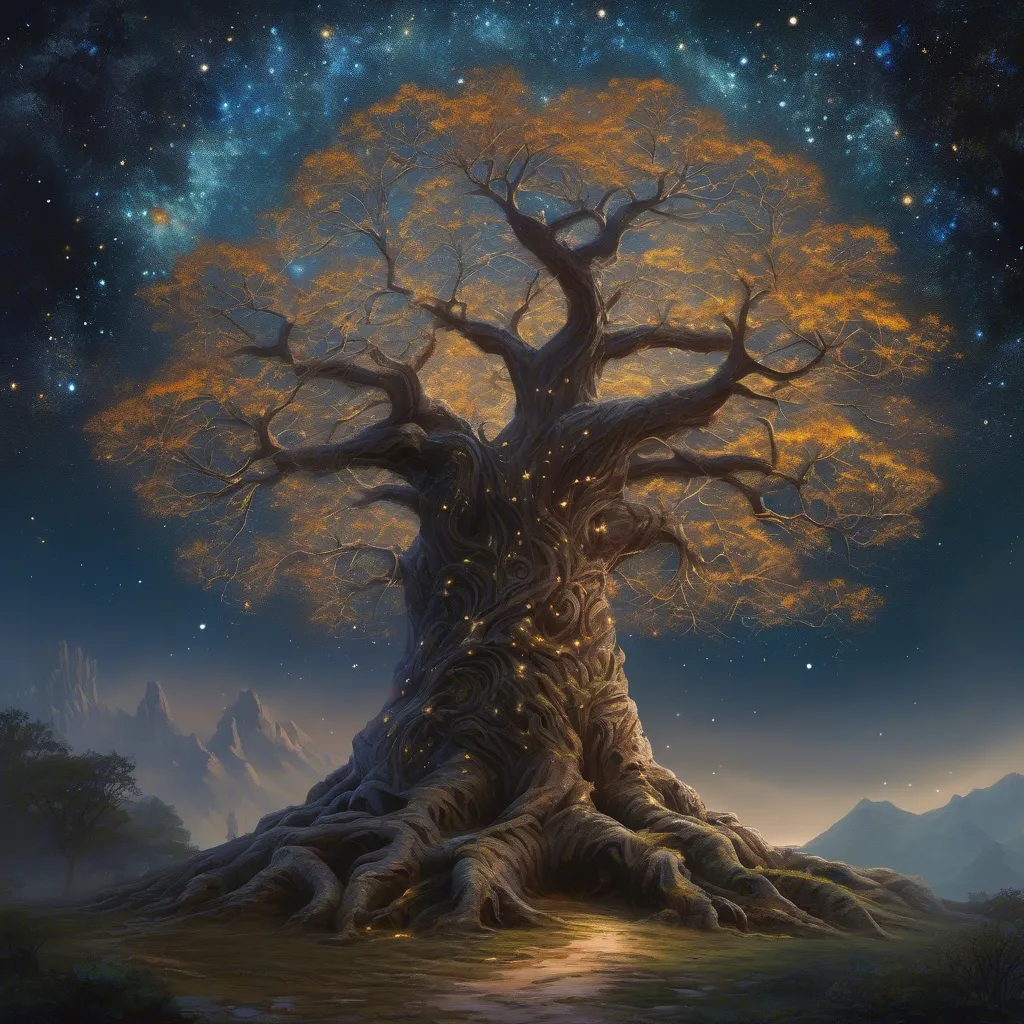

In [5]:
# Step 1: Install necessary libraries
# gradio_client for the API, and Pillow for image conversion.
# The '-q' flag makes the installation quiet.
!pip install -q gradio_client Pillow

# Step 2: Run the image generation and display
from gradio_client import Client
from IPython.display import Image, display
from PIL import Image as PILImage # Import Pillow, aliased to avoid name conflicts

# Initialize the client to connect to the Hugging Face Space
client = Client("mojitocup/stable-diffusion-xl-base-1.0")
print("✅ Client loaded successfully.")

# --- Define your parameters ---
prompt = "A majestic tree with a crown made of stars, fantasy painting, detailed, epic"
negative_prompt = "cartoon, blurry, low quality, watermark, text, signature"
seed = 12345
randomize_seed = False # Set to True to get a different image each time
guidance_scale = 8.0
num_inference_steps = 35

# --- Call the API ---
print("⌛ Generating image...")
try:
    result = client.predict(
            prompt=prompt,
            negative_prompt=negative_prompt,
            seed=seed,
            randomize_seed=randomize_seed,
            guidance_scale=guidance_scale,
            num_inference_steps=num_inference_steps,
            api_name="/infer"
    )

    # --- Process the result ---
    # The result is a tuple: (image_path, seed_used)
    image_path, generated_seed = result

    print(f"✅ Image generation complete!")
    print(f"   -> Image saved to temporary path: {image_path}")
    print(f"   -> Seed used for generation: {generated_seed}")

    # --- Convert and Display the Image ---
    if image_path:
        print("🔧 Converting WebP image to PNG for display in Colab...")

        # Open the WebP image using Pillow
        webp_image = PILImage.open(image_path)

        # Define a new path for the PNG image
        png_path = "generated_image.png"

        # Save the image in PNG format
        webp_image.save(png_path, "PNG")

        print(f"🖼️ Displaying the final image:")
        # Display the newly created PNG image
        display(Image(filename=png_path))
    else:
        print("❌ Image generation failed: No image path was returned.")

except Exception as e:
    print(f"An error occurred: {e}")